In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu118'

##Creating our data

In [ ]:
weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

##Splitting data int training and test set

In [ ]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split];
X_test,y_test=X[train_split:],y[train_split:];
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c="b",s=4,label="Training Data")
  plt.scatter(test_data,test_label,c="g",s=4,label="Test Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size":14});

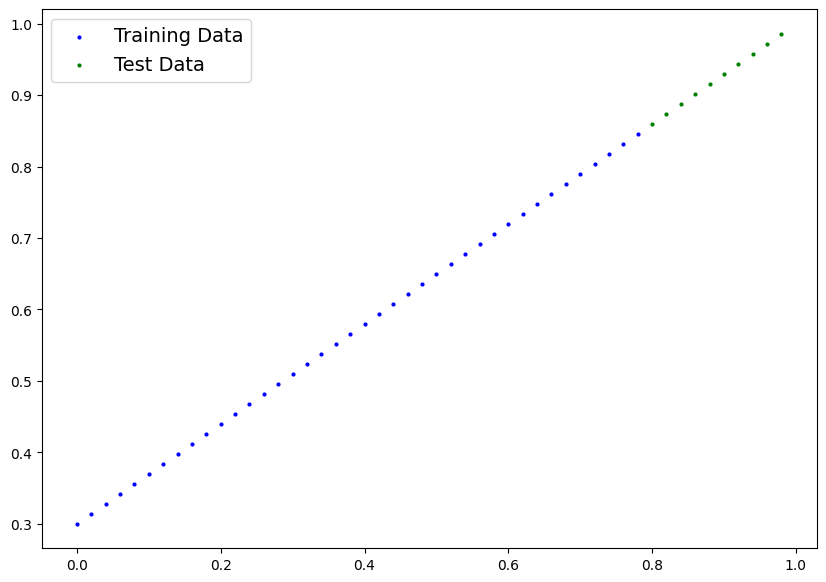

In [ ]:
plot_predictions()

##Build Model

In [ ]:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regress

In [ ]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##Make predictions using torch.inference_mode()

In [ ]:
with torch.inference_mode():#disables autograding
  y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

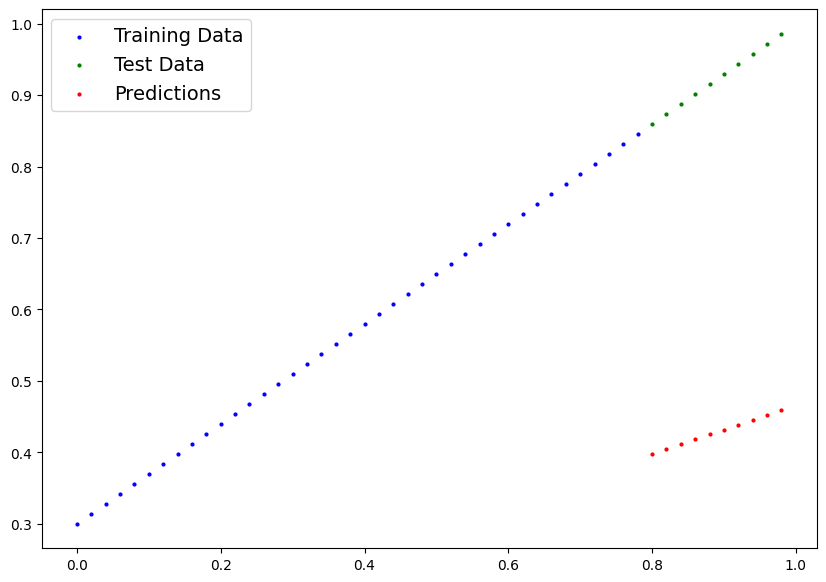

In [ ]:
plot_predictions(predictions=y_preds)

##Train Model

In [112]:
#set up a loss function
loss_fn=nn.L1Loss()

#setup an optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

Building a training loop in pytorch

0. Loop Through the data
1. Forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward-move backwards through the network to calculate the gradients of each of the parameter of our modelwith respect to the loss
5. Optimizer step-use the optimizer toadjust our model's parameters to try and improve the loss




In [ ]:
torch.manual_seed(42)
#An epoch is one loop through the data
epochs=200
#Track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  #set the model to trainig mode
  model_0.train()#set require_grads to true for all parameters that require gradients
  #1.Forward Pass
  y_pred=model_0(X_train)

  #2.Calculate the loss
  loss=loss_fn(y_pred,y_train)

  #3.Optimizer zero grad
  optimizer.zero_grad()

  #4.Perform backprop on the loss
  loss.backward()

  #5.Step the Optimizer(Performs gradient descent)
  optimizer.step()
  model_0.eval()#turns off gradient tracking

  with torch.inference_mode():
    #1. Do the forward pass
    test_pred=model_0(X_test)
    #2. Calculate the loss
    test_loss=loss_fn(test_pred,y_test)
    if epoch%10==0:
      epoch_count.append(epoch)
      loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch:{epoch} | Loss:{loss} | Test Loss:{test_loss}")
      print(model_0.state_dict())




Epoch:0 | Loss:0.31288138031959534 | Test Loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss:0.1976713240146637 | Test Loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | Loss:0.08908725529909134 | Test Loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | Loss:0.053148526698350906 | Test Loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | Loss:0.04543796554207802 | Test Loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | Loss:0.04167863354086876 | Test Loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | Loss:0.03818932920694351 | Test Loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch:70 | Loss

In [ ]:
loss_values,test_loss_values

([array(0.31288138, dtype=float32),
  array(0.19767132, dtype=float32),
  array(0.08908726, dtype=float32),
  array(0.05314853, dtype=float32),
  array(0.04543797, dtype=float32),
  array(0.04167863, dtype=float32),
  array(0.03818933, dtype=float32),
  array(0.0347609, dtype=float32),
  array(0.03132383, dtype=float32),
  array(0.0278874, dtype=float32),
  array(0.02445896, dtype=float32),
  array(0.02102021, dtype=float32),
  array(0.01758547, dtype=float32),
  array(0.01415539, dtype=float32),
  array(0.01071659, dtype=float32),
  array(0.00728353, dtype=float32),
  array(0.00385178, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32),
  array(0.00893248, dtype=float32)],
 [array(0.48106518, dtype=float32),
  array(0.3463552, dtype=float32),
  array(0.2172966, dtype=float32),
  array(0.14464018, dtype=float32),
  array(0.11360953, dtype=float32),
  array(0.09919948, dtype=float32),
  array(0.08886633, dtype=float32),
  array(0.08059376, dtype=float

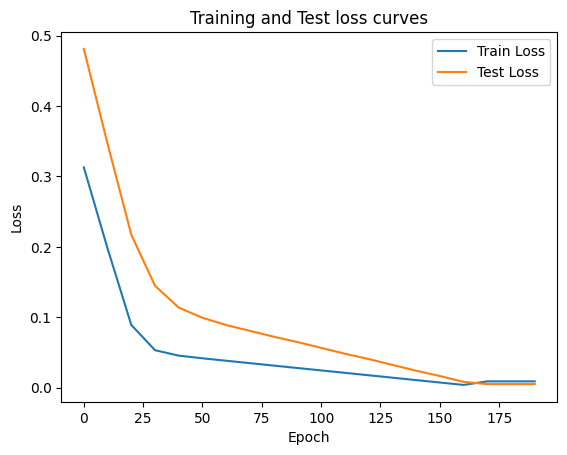

In [ ]:
#Plot the loss curves
plt.plot(epoch_count,loss_values,label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and Test loss curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_pred_new=model_0(X_test)

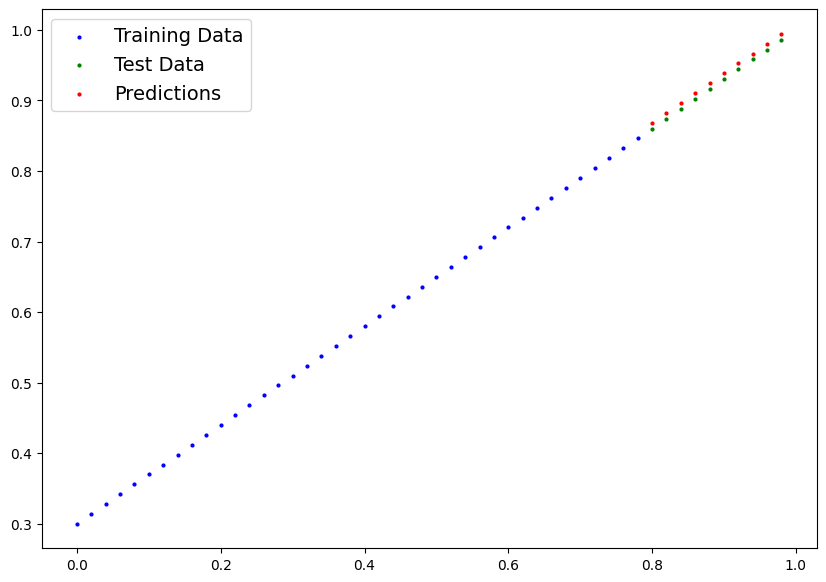

In [ ]:
plot_predictions(predictions=y_pred_new)

##Saving a Model in Pytorch

In [ ]:
from pathlib import Path

#1.Create models directory
MODEL_PATH=Path("Models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME="01_pytorch_workflow.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

#3.Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



Saving model to:Models/01_pytorch_workflow.pth


##Loading a Pytorch Model

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#To load a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0=LinearRegressionModel()

#2 Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])